#**DECISION TREE**
>**Tasks:**
>1. Data Preparation.


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
xls = pd.ExcelFile('heart_disease.xlsx')

In [146]:
# Getting the name of the sheets.
print("Sheet Name:", xls.sheet_names)

Sheet Name: ['Description', 'Heart_disease']


In [147]:
# Reading the data in the 2 sheet.
df = xls.parse(xls.sheet_names[1])
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [149]:
df.shape

(908, 13)

In [150]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [151]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


>2. Exploratory Data Analysis (EDA):

In [152]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [153]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [154]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [155]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include='object').columns

In [156]:
print(df[numerical_col].dtypes,"\n")
print(df[categorical_col].dtypes)

age           int64
trestbps      int64
chol          int64
thalch        int64
oldpeak     float64
num           int64
dtype: object 

sex        object
cp         object
restecg    object
exang      object
slope      object
thal       object
dtype: object


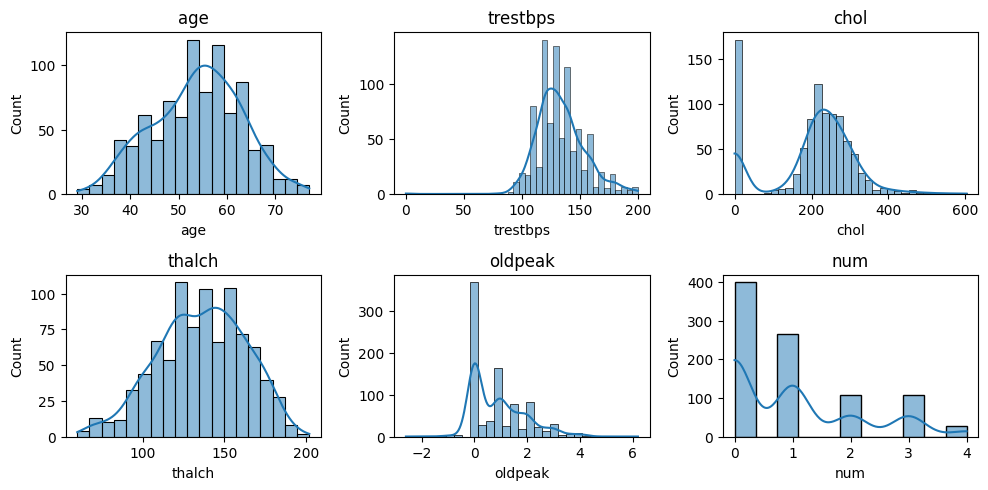

In [157]:
# Histogram

plt.figure(figsize=(10,7))
for i, col in enumerate(numerical_col):
  plt.subplot(3,3,i+1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.tight_layout()


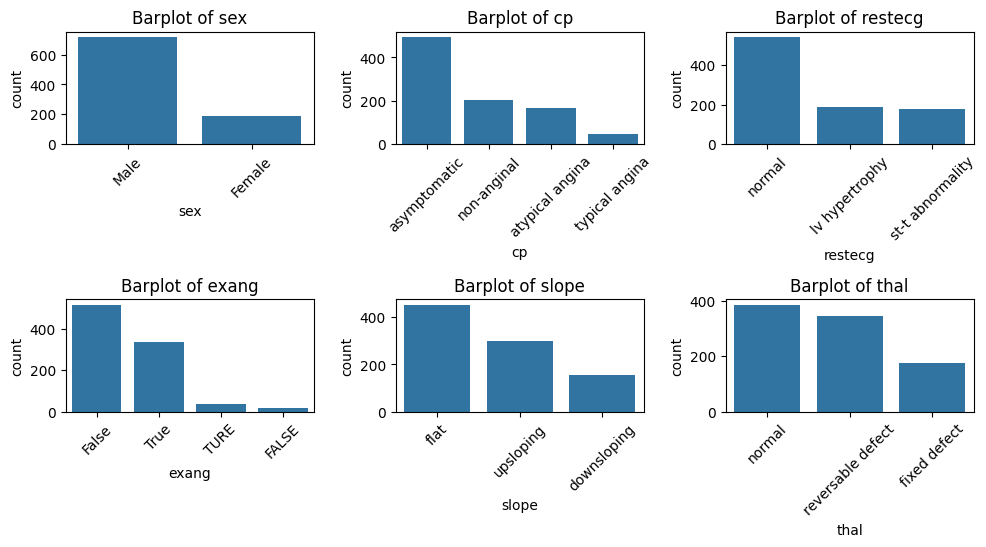

In [158]:
# Bar plot

plt.figure(figsize=(10,7))
for i,col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    plt.title(f'Barplot of {col}')
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45)
    plt.xlabel(f'{col}')
plt.tight_layout()
plt.show()

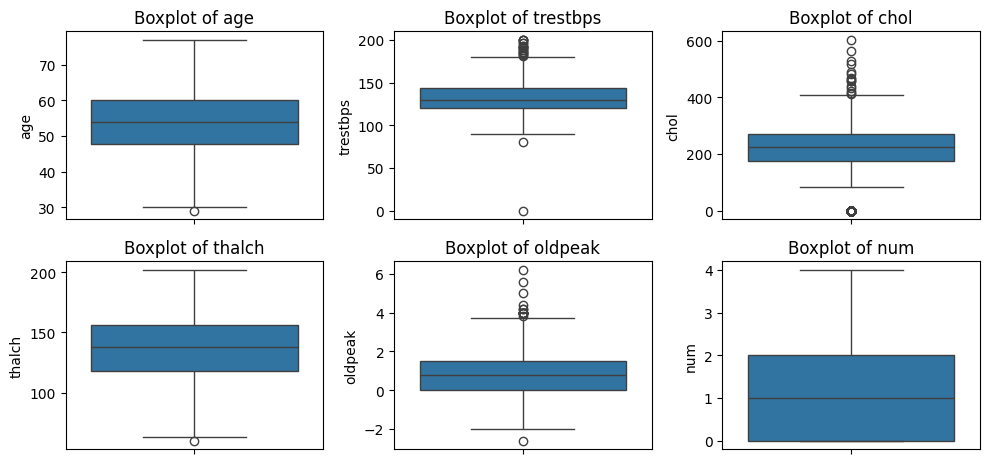

In [159]:
# Box plot

plt.figure(figsize=(10,7))
for i, col in enumerate(numerical_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [160]:
# Handling the outliers
for col in numerical_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


age: 1 outliers
trestbps: 22 outliers
chol: 187 outliers
thalch: 1 outliers
oldpeak: 16 outliers
num: 0 outliers


>Outliers were detected using the IQR method in features such as trestbps, chol, and oldpeak. Since Decision Tree models are robust to outliers and the extreme values were within realistic medical ranges, no capping or removal was applied.

In [161]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128728,-0.323058
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000,0.416580
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416580,1.000000


>3. Feature Engineering:

In [162]:
df['exang'].value_counts()

,count
exang,
False,516
True,337
TURE,36
FALSE,19


In [163]:
# Replace string versions with boolean values
df['exang'] = df['exang'].replace({
    'true': True,
    'false': False,
    'TURE': True,
    'FALSE': False  # Added 'FALSE' to the replacement dictionary
})

# Verify the unique values after cleaning
print(df['exang'].value_counts())

exang
False    535
True     373
Name: count, dtype: int64


/tmp/ipython-input-1492282206.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({


In [164]:
df['exang'] = df['exang'].astype(int)

In [165]:
df[numerical_col].dtypes

,0
age,int64
trestbps,int64
chol,int64
thalch,int64
oldpeak,float64
num,int64


In [166]:
df['fbs'].value_counts()

,count
fbs,
False,723
True,185


In [167]:
df['fbs'] = df['fbs'].astype(int)

In [168]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,int64
oldpeak,float64


In [169]:
# Scaling

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize df_encoded
df_encoded = df.copy()

# Scale numerical columns
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.drop('num')
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])



In [170]:
# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns
label_enc = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

In [171]:
# Define features and target
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

In [172]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0


>4. Decision Tree Classification:

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (726, 12)
Testing set shape: (182, 12)


In [175]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [179]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
y_pred

array([1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 3, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 3, 0,
       2, 2, 0, 0, 0, 1, 2, 3, 0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 2, 3, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 0, 1, 1, 0, 2, 3, 1, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 0, 1, 3, 0, 2, 0, 1, 1, 1, 2, 3, 0, 0, 0, 2, 0, 4,
       2, 1, 4, 2, 0, 0])

In [177]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision_score: ",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("Recall_score: ",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("F1_score: ",f1_score(y_test,y_pred,average='weighted',zero_division=0))

Accuracy:  51.64835164835166
Precision_score:  0.513520213192881
Recall_score:  0.5164835164835165
F1_score:  0.5146185682122983


>5. Hyperparameter Tuning:

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [182]:
# Best model
best_dt = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [183]:
# Predictions
y_pred_best = best_dt.predict(X_test)

# Evaluate
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred_best):.2f}")
print("\nClassification Report after tuning:\n", classification_report(y_test, y_pred_best))

Accuracy after tuning: 0.55

Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        89
           1       0.38      0.54      0.44        48
           2       0.21      0.14      0.17        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.27      0.30      0.28       182
weighted avg       0.49      0.55      0.52       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [184]:
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
best_dt.fit(X_train, y_train)
y_pred_balanced = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           0       0.81      0.70      0.75        89
           1       0.44      0.44      0.44        48
           2       0.16      0.23      0.19        22
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.54      0.49      0.51       182



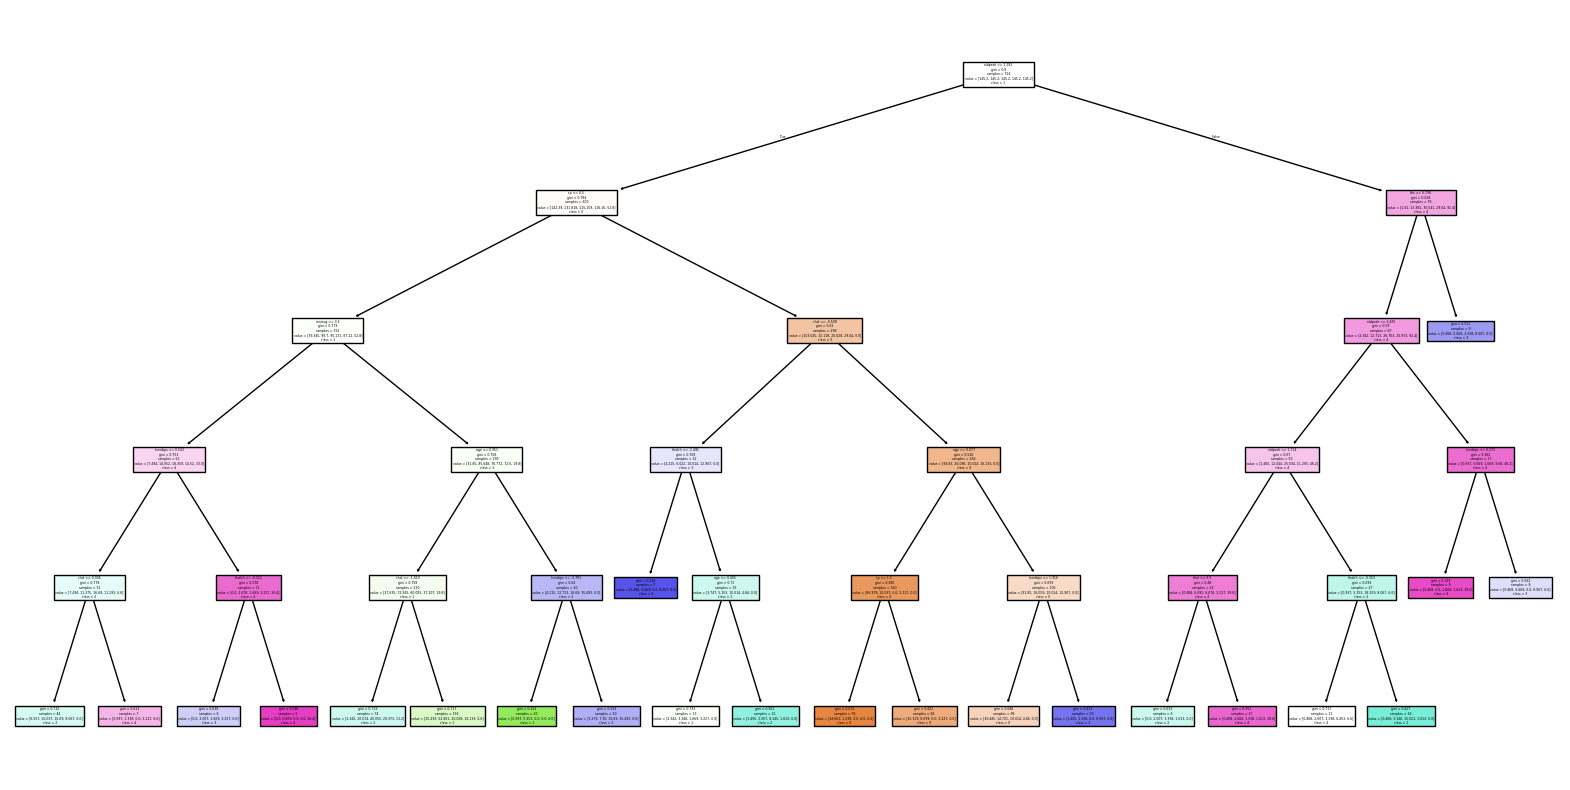

In [186]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(i) for i in range(5)], filled=True)
plt.show()


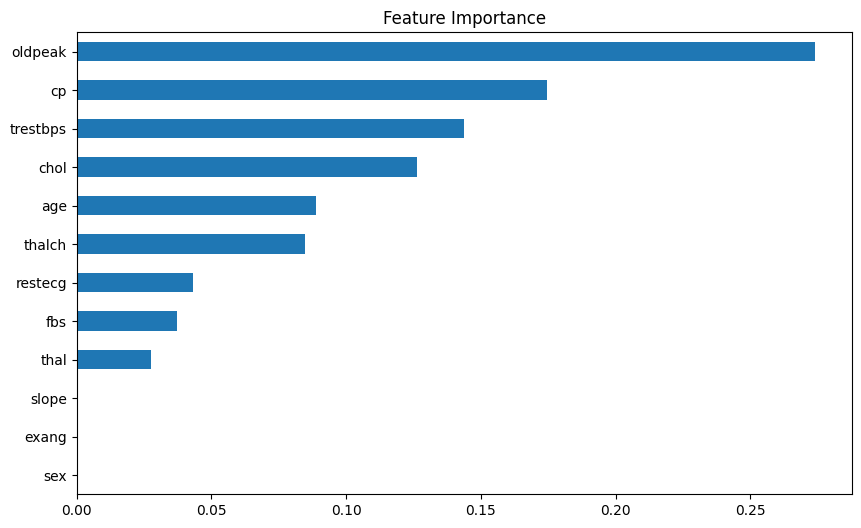

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


## **Conclusion**

The Decision Tree model was applied to predict heart disease using the given dataset. After data preparation, handling missing values, and encoding features, the model achieved an accuracy of **~55%** after hyperparameter tuning. The tree performed well on majority classes but struggled with minority classes due to class imbalance. Key features like chest pain type, max heart rate, and cholesterol were most influential. Decision Trees are interpretable and robust to outliers, but performance can be improved with class balancing or ensemble methods.



## Interview Questions:

**1️ Common hyperparameters of Decision Trees and their effects:**

* **`max_depth`** – limits tree depth; prevents overfitting if low, underfitting if too shallow.
* **`min_samples_split`** – minimum samples to split a node; higher values reduce overfitting.
* **`min_samples_leaf`** – minimum samples at leaf nodes; prevents very small leaves.
* **`criterion`** – function to measure split quality (`gini` or `entropy`).
* **`class_weight`** – adjusts importance of classes for imbalanced data.

**2️ Difference between Label Encoding and One-Hot Encoding:**

* **Label Encoding** converts categories to integers (0,1,2…) and is suitable for ordinal data or tree-based models.
* **One-Hot Encoding** creates binary columns for each category, avoiding ordinal assumptions, ideal for linear models.

